In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("Downloads/nbaallelo.csv")

In [3]:
df


gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947  11/1/1946   
1               1  194611010TRH   NBA        1     1947  11/1/1946   
2               2  194611020CHS   NBA        0     1947  11/2/1946   
3               2  194611020CHS   NBA        1     1947  11/2/1946   
4               3  194611020DTF   NBA        0     1947  11/2/1946   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015  6/11/2015   
126310      63156  201506140GSW   NBA        0     2015  6/14/2015   
126311      63156  201506140GSW   NBA        1     2015  6/14/2015   
126312      63157  201506170CLE   NBA        0     2015  6/16/2015   
126313      63157  201506170CLE   NBA        1     2015  6/16/2015   

        seasongame  is_playoffs team_id    fran_id  ...  win_equiv  opp_id  \
0                1            0     TRH    Huskies  ...  40.294830     NYK   
1                1            0     NYK     Knicks  ...  41.705170     TRH   
2                1            0     CHS      Stags  ...  42.012257     NYK   
3                2            0     NYK     Knicks  ...  40.692783     CHS   
4                1            0     DTF    Falcons  ...  38.864048     WSC   
...            ...          ...     ...        ...  ...        ...     ...   
126309         100            1     CLE  Cavaliers  ...  60.309792     GSW   
126310         102            1     GSW   Warriors  ...  68.013329     CLE   
126311         101            1     CLE  Cavaliers  ...  60.010067     GSW   
126312         102            1     CLE  Cavaliers  ...  59.290245     GSW   
126313         103            1     GSW   Warriors  ...  68.519516     CLE   

         opp_fran  opp_pts  opp_elo_i  opp_elo_n  game_location  game_result  \
0          Knicks       68  1300.0000  1306.7233              H            L   
1         Huskies       66  1300.0000  1293.2767              A            W   
2          Knicks       47  1306.7233  1297.0712              H            W   
3           Stags       63  1300.0000  1309.6521              A            L   
4        Capitols       50  1300.0000  1320.3811              H            L   
...           ...      ...        ...        ...            ...          ...   
126309   Warriors      103  1790.9591  1809.9791              H            L   
126310  Cavaliers       91  1704.3949  1700.7391              H            W   
126311   Warriors      104  1809.9791  1813.6349              A            L   
126312   Warriors      105  1813.6349  1822.2881              H            L   
126313  Cavaliers       97  1700.7391  1692.0859              A            W   

        forecast notes  
0       0.640065   NaN  
1       0.359935   NaN  
2       0.631101   NaN  
3       0.368899   NaN  
4       0.640065   NaN  
...          ...   ...  
126309  0.546572   NaN  
126310  0.765565   NaN  
126311  0.234435   NaN  
126312  0.481450   NaN  
126313  0.518550   NaN  

[126314 rows x 23 columns]

In [4]:
df.dtypes

gameorder          int64
game_id           object
lg_id             object
_iscopy            int64
year_id            int64
date_game         object
seasongame         int64
is_playoffs        int64
team_id           object
fran_id           object
pts                int64
elo_i            float64
elo_n            float64
win_equiv        float64
opp_id            object
opp_fran          object
opp_pts            int64
opp_elo_i        float64
opp_elo_n        float64
game_location     object
game_result       object
forecast         float64
notes             object
dtype: object

In [5]:
df.size


2905222

In [6]:
df.shape

(126314, 23)

In [7]:
df.isnull().sum()

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

In [8]:
df["game_result"]= df["game_result"].map({"W":1, "L":0})
df

gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947  11/1/1946   
1               1  194611010TRH   NBA        1     1947  11/1/1946   
2               2  194611020CHS   NBA        0     1947  11/2/1946   
3               2  194611020CHS   NBA        1     1947  11/2/1946   
4               3  194611020DTF   NBA        0     1947  11/2/1946   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015  6/11/2015   
126310      63156  201506140GSW   NBA        0     2015  6/14/2015   
126311      63156  201506140GSW   NBA        1     2015  6/14/2015   
126312      63157  201506170CLE   NBA        0     2015  6/16/2015   
126313      63157  201506170CLE   NBA        1     2015  6/16/2015   

        seasongame  is_playoffs team_id    fran_id  ...  win_equiv  opp_id  \
0                1            0     TRH    Huskies  ...  40.294830     NYK   
1                1            0     NYK     Knicks  ...  41.705170     TRH   
2                1            0     CHS      Stags  ...  42.012257     NYK   
3                2            0     NYK     Knicks  ...  40.692783     CHS   
4                1            0     DTF    Falcons  ...  38.864048     WSC   
...            ...          ...     ...        ...  ...        ...     ...   
126309         100            1     CLE  Cavaliers  ...  60.309792     GSW   
126310         102            1     GSW   Warriors  ...  68.013329     CLE   
126311         101            1     CLE  Cavaliers  ...  60.010067     GSW   
126312         102            1     CLE  Cavaliers  ...  59.290245     GSW   
126313         103            1     GSW   Warriors  ...  68.519516     CLE   

         opp_fran  opp_pts  opp_elo_i  opp_elo_n  game_location  game_result  \
0          Knicks       68  1300.0000  1306.7233              H            0   
1         Huskies       66  1300.0000  1293.2767              A            1   
2          Knicks       47  1306.7233  1297.0712              H            1   
3           Stags       63  1300.0000  1309.6521              A            0   
4        Capitols       50  1300.0000  1320.3811              H            0   
...           ...      ...        ...        ...            ...          ...   
126309   Warriors      103  1790.9591  1809.9791              H            0   
126310  Cavaliers       91  1704.3949  1700.7391              H            1   
126311   Warriors      104  1809.9791  1813.6349              A            0   
126312   Warriors      105  1813.6349  1822.2881              H            0   
126313  Cavaliers       97  1700.7391  1692.0859              A            1   

        forecast notes  
0       0.640065   NaN  
1       0.359935   NaN  
2       0.631101   NaN  
3       0.368899   NaN  
4       0.640065   NaN  
...          ...   ...  
126309  0.546572   NaN  
126310  0.765565   NaN  
126311  0.234435   NaN  
126312  0.481450   NaN  
126313  0.518550   NaN  

[126314 rows x 23 columns]

In [9]:
df= df.fillna(0)
df.isna().sum()

gameorder        0
game_id          0
lg_id            0
_iscopy          0
year_id          0
date_game        0
seasongame       0
is_playoffs      0
team_id          0
fran_id          0
pts              0
elo_i            0
elo_n            0
win_equiv        0
opp_id           0
opp_fran         0
opp_pts          0
opp_elo_i        0
opp_elo_n        0
game_location    0
game_result      0
forecast         0
notes            0
dtype: int64

In [10]:
h_d= df.select_dtypes(include=["int64","float64"])


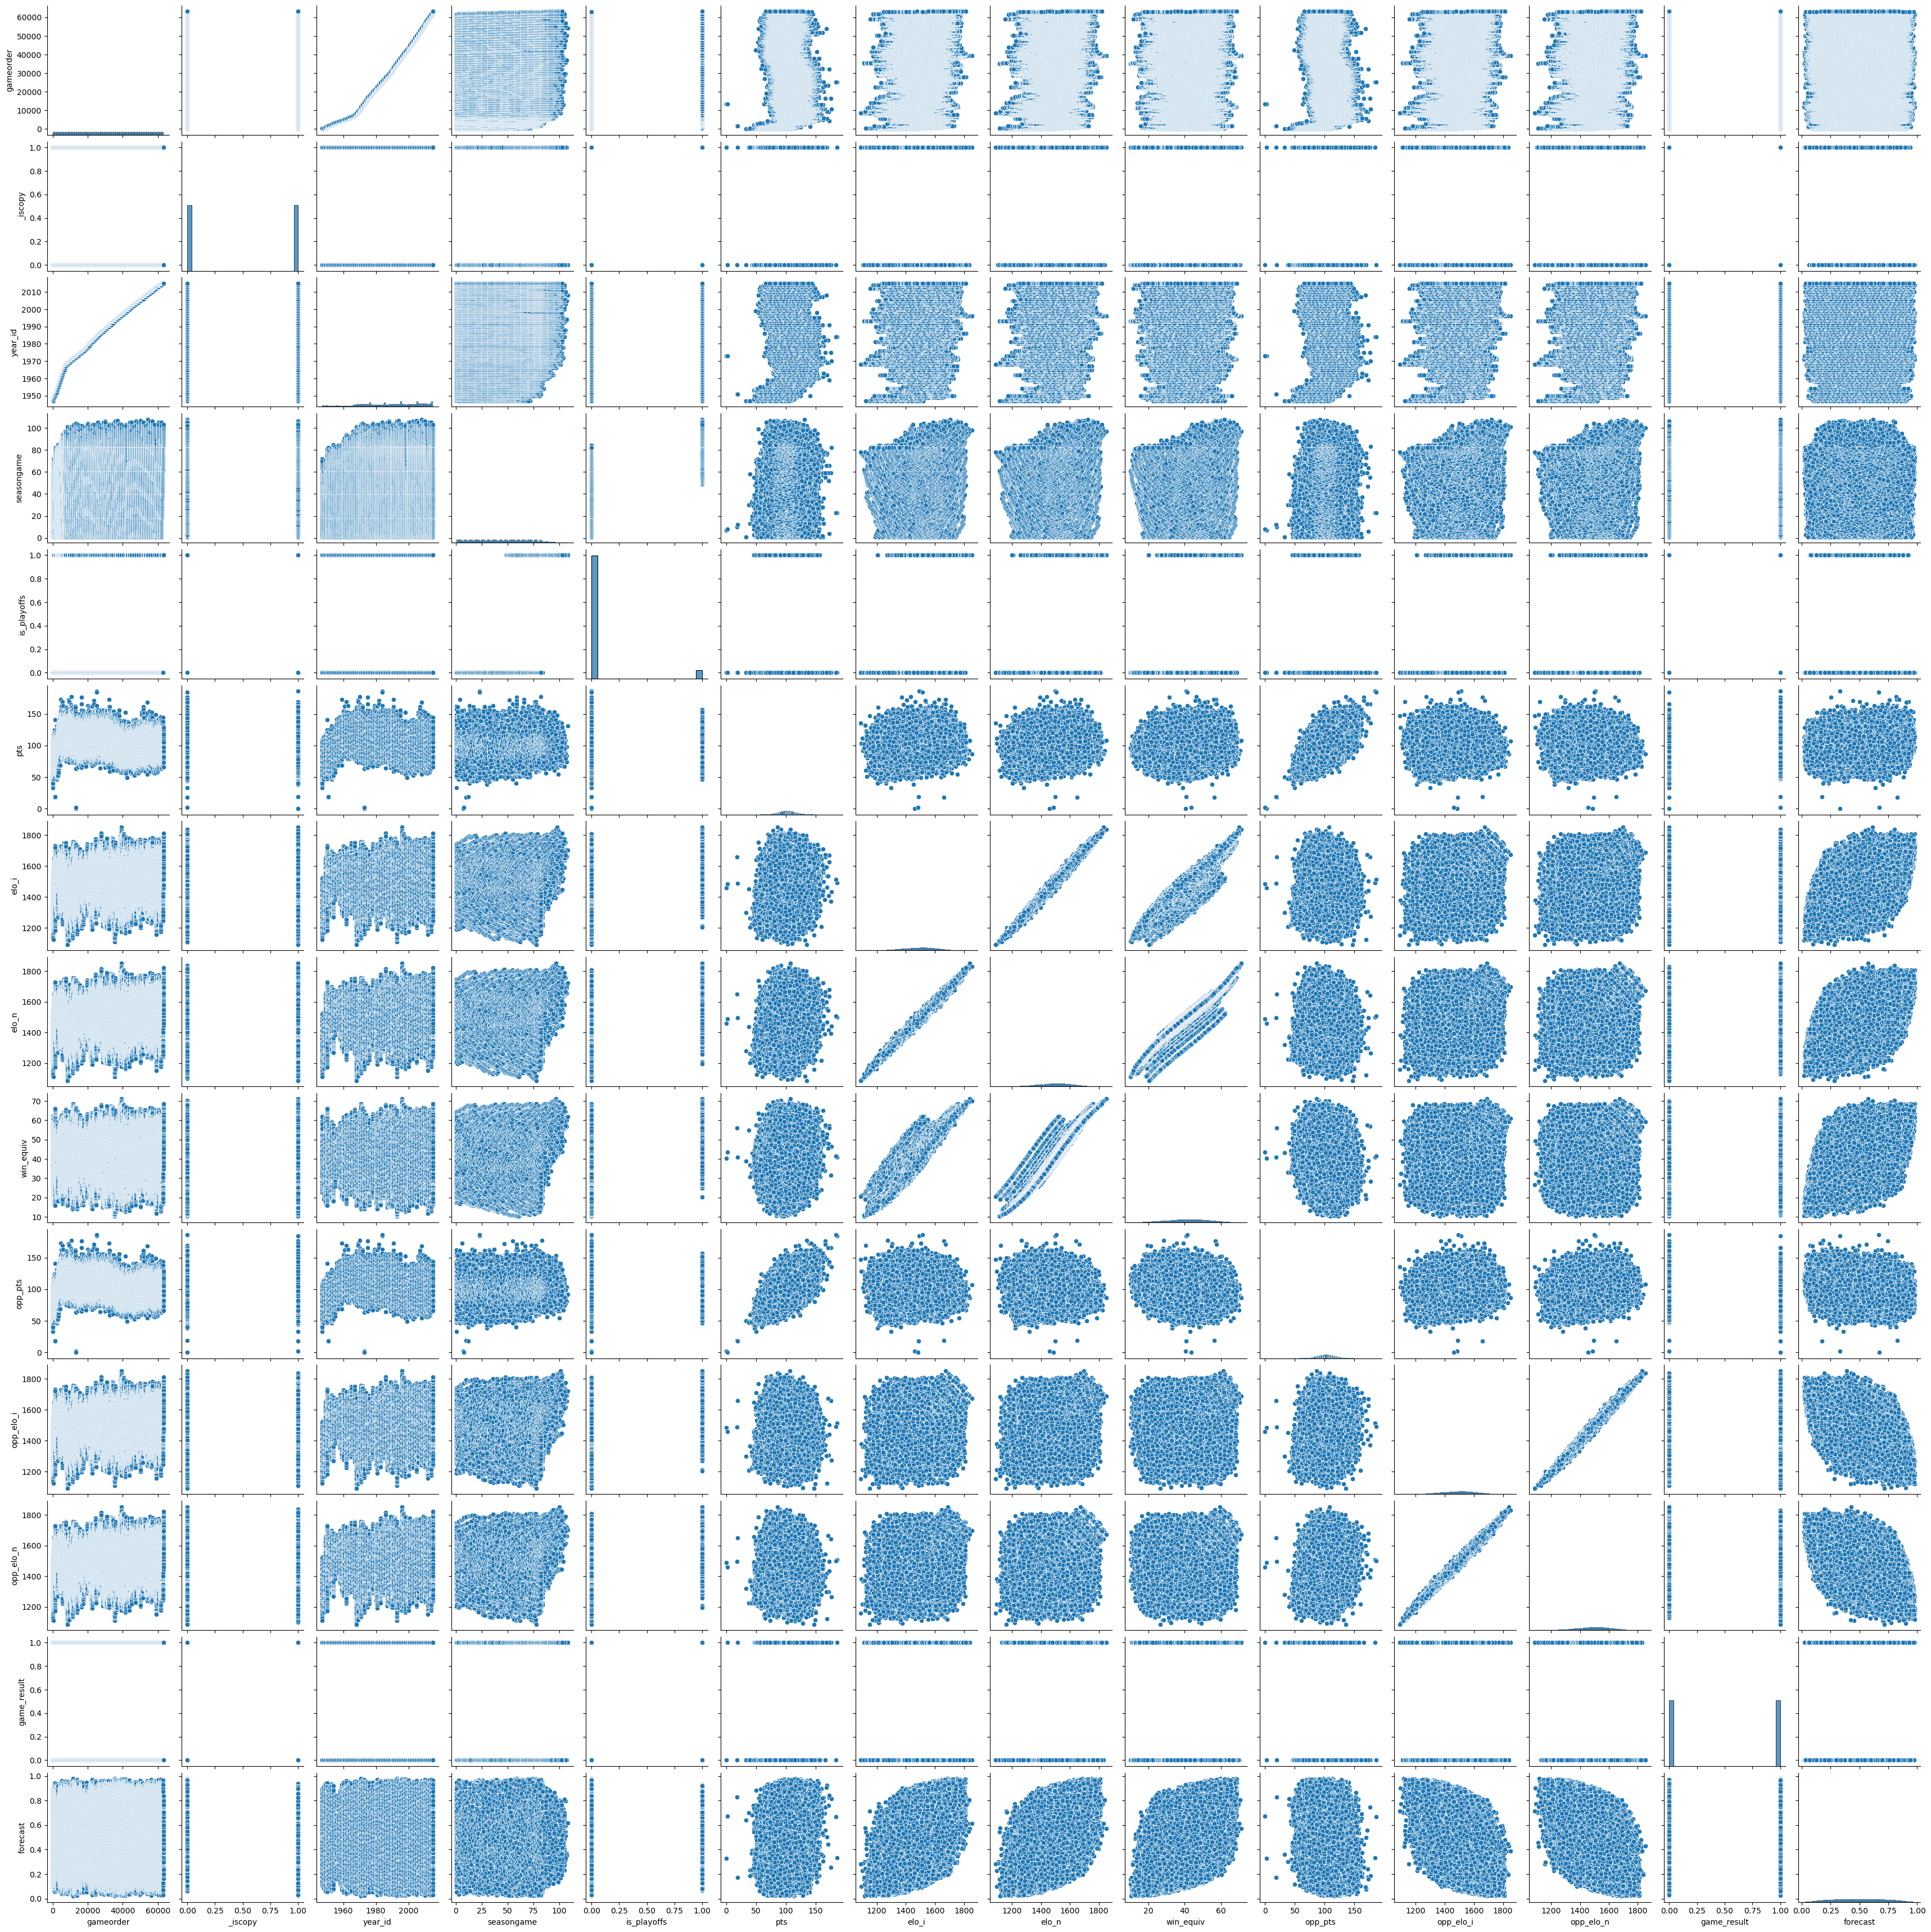

In [11]:
sb.pairplot(df)

# SCATTER PLOT SHOWS THAT MOST OF THE POINTS WERE SCORED IN HOME MATCHES

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf("opp_pts", "pts", "year_id")  # Example: 3D surface plot

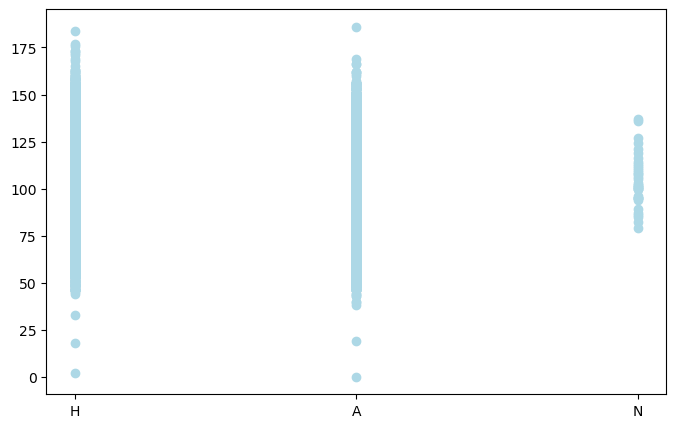

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(df["game_location"], df["pts"],color='lightblue')

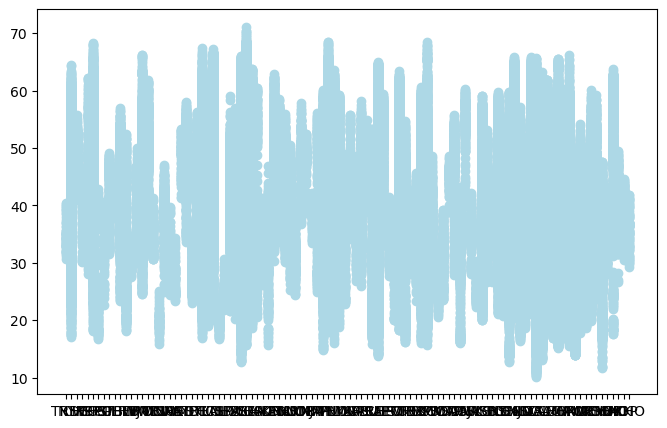

In [13]:

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(df["team_id"], df["win_equiv"],color='lightblue')

# BAR PLOT SHOWS MOST MATCHES PLAYED AT HOME LOCATION WERE WON

<Axes: xlabel='game_location', ylabel='game_result'>

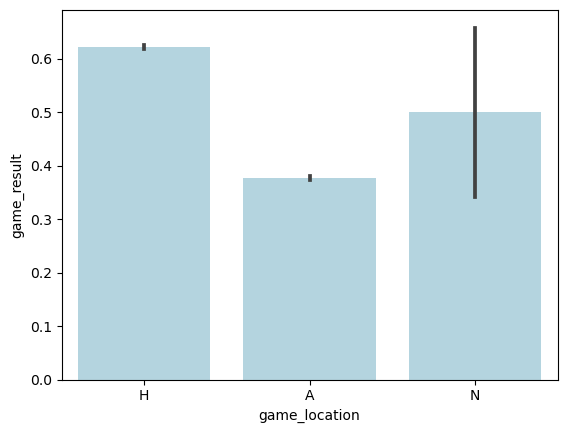

In [14]:
sb.barplot(x=df["game_location"],y = df['game_result'], color='lightblue')

<Axes: xlabel='game_result', ylabel='pts'>

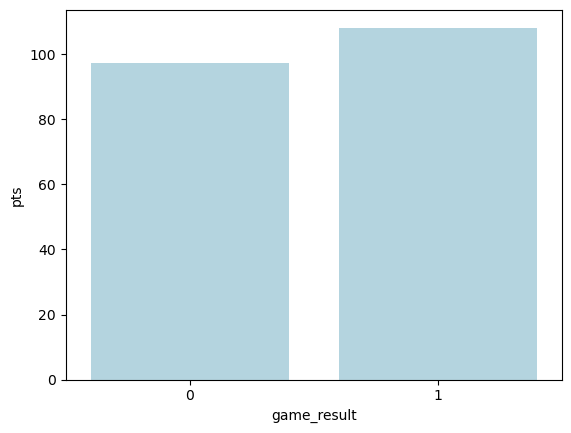

In [15]:
sb.barplot(x=df["game_result"],y = df['pts'], color='lightblue')

# LINE PLOT REPRESENTS THE DECLINE IN WINS AS THE LOCATION CHANGES 

<Axes: xlabel='game_location', ylabel='pts'>

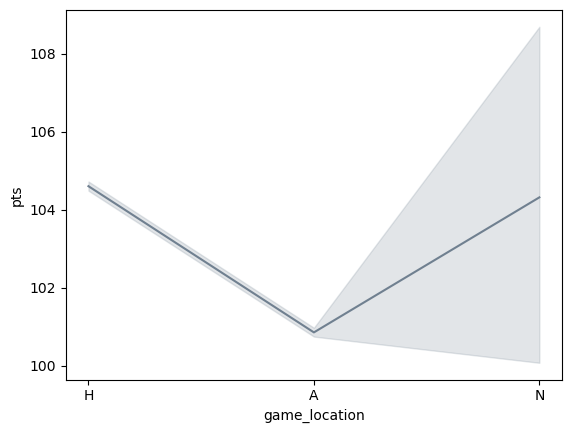

In [16]:
sb.lineplot(x=df["game_location"],y=df["pts"],color='slategray')

In [17]:
sb.lineplot(x=df["elo_i"],y=['win_equiv'],color='darkblue')

ValueError: array length 1 does not match index length 126314

C:\Users\ksham\AppData\Local\Temp\ipykernel_40348\2007806897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

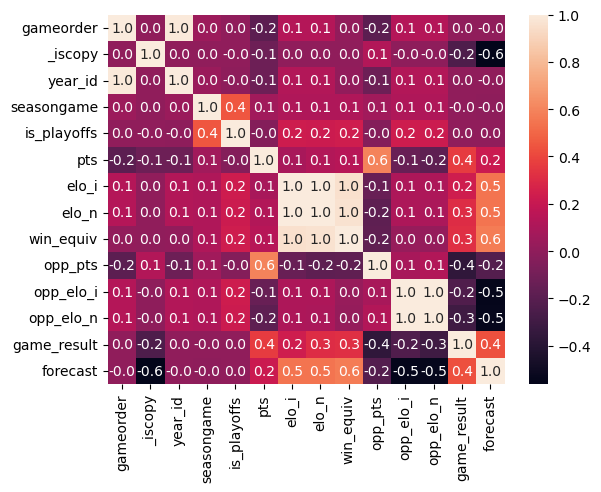

In [18]:
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, fmt=".1f")

# COUNTING THE WINS AND LOSES OF THE TOTAL MATCHES PLAYED

In [19]:
win_count= df[df['game_result'] == 1]['game_result'].count()
win_count


63157

In [20]:
lose_count= df[df['game_result'] == 0]['game_result'].count()
lose_count


63157

In [21]:
# SHOWS THAT HALF OF THE TOTAL MATCHES WERE WON

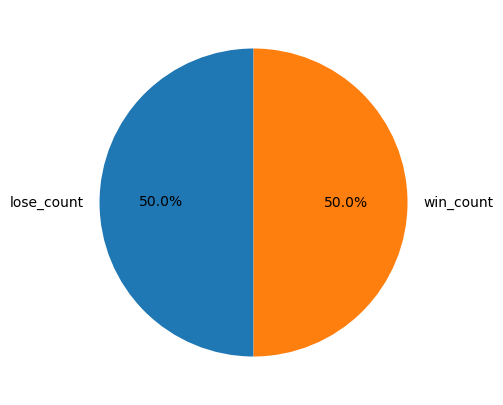

In [22]:
count=df['game_result'].value_counts()
labels=['lose_count','win_count']
plt.figure(figsize=(5, 5))
plt.pie(count, labels=labels, startangle=90, autopct= '%1.1f%%')
plt.show()

<Axes: xlabel='seasongame', ylabel='Count'>

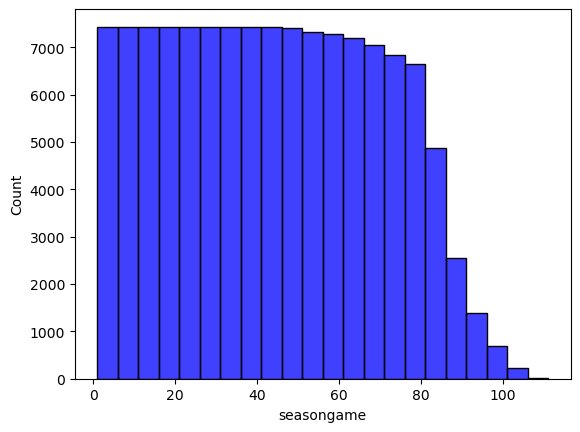

In [23]:
sb.histplot(df["seasongame"],color="blue", binwidth=5)

<Axes: xlabel='year_id', ylabel='Count'>

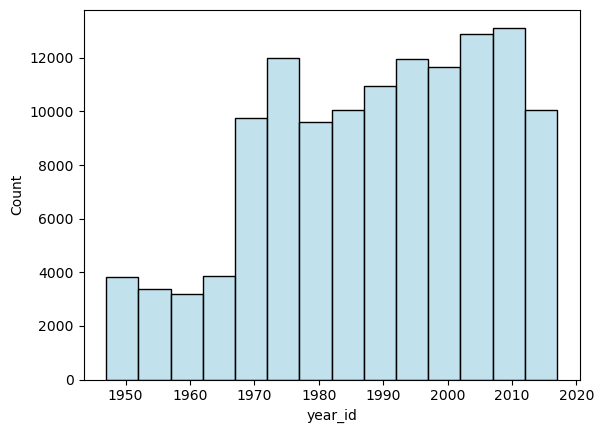

In [24]:
sb.histplot(df["year_id"],color="lightblue", binwidth=5)

In [ ]:
sb.countplot(x=df["game_id"],color="teal")

In [ ]:
sb.displot(df['year_id'], kde=True, bins=10)

In [ ]:
sb.boxplot(df["win_equiv"])